                                CONSUMER PURCHASE BEHAVIOUR ANALYSIS

                                IMPORTING THE REQUIRED LIBRARIES 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
from sklearn import linear_model as lm

                                        CALLING THE DATA

In [2]:
data = pd.read_csv(r'E:\project\dataset\train\train.csv')

In [3]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


                        CHECKING FOR ANY NULL VALUES AND DATA PRE-PROCESSING

In [4]:
data.isnull().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

                                    FILLING THE NULL VALUES 

In [5]:
M2=data["Product_Category_2"].mean()
M2

9.842329251122386

In [6]:
M3=data["Product_Category_3"].mean()
M3

12.668243206790512

In [7]:
data['Product_Category_2'].fillna(M2, inplace=True)
data['Product_Category_3'].fillna(M3, inplace=True)

In [8]:
data.isnull().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2            False
Product_Category_3            False
Purchase                      False
dtype: bool

In [9]:
data.drop(['User_ID'],axis = 1,inplace=True)


In [10]:
data

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,9.842329,12.668243,8370
1,P00248942,F,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,P00087842,F,0-17,10,A,2,0,12,9.842329,12.668243,1422
3,P00085442,F,0-17,10,A,2,0,12,14.000000,12.668243,1057
4,P00285442,M,55+,16,C,4+,0,8,9.842329,12.668243,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,M,51-55,13,B,1,1,20,9.842329,12.668243,368
550064,P00375436,F,26-35,1,C,3,0,20,9.842329,12.668243,371
550065,P00375436,F,26-35,15,B,4+,1,20,9.842329,12.668243,137
550066,P00375436,F,55+,1,C,2,0,20,9.842329,12.668243,365


In [11]:
data['Product_ID']=(data['Product_ID'].str.strip("P").astype("int"))
data['Age']=(data['Age'].str.strip('+'))

In [12]:
data['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55        21504
0-17      15102
Name: Age, dtype: int64

In [13]:
data['Age'].replace(['0-17','18-25','26-35','36-45','46-50','51-55','55'],[1,2,3,4,5,6,7],inplace=True)         

In [14]:
data['Stay_In_Current_City_Years']=(data['Stay_In_Current_City_Years'].str.strip('+').astype('float'))


In [15]:
data["City_Category"].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [16]:
data['City_Category'].replace(['A','B','C'],[1,2,3],inplace=True)

In [17]:
data['Gender'].replace(['F','M'],[0,1],inplace=True)   

In [18]:
data

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,69042,0,1,10,1,2.0,0,3,9.842329,12.668243,8370
1,248942,0,1,10,1,2.0,0,1,6.000000,14.000000,15200
2,87842,0,1,10,1,2.0,0,12,9.842329,12.668243,1422
3,85442,0,1,10,1,2.0,0,12,14.000000,12.668243,1057
4,285442,1,7,16,3,4.0,0,8,9.842329,12.668243,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,372445,1,6,13,2,1.0,1,20,9.842329,12.668243,368
550064,375436,0,3,1,3,3.0,0,20,9.842329,12.668243,371
550065,375436,0,3,15,2,4.0,1,20,9.842329,12.668243,137
550066,375436,0,7,1,3,2.0,0,20,9.842329,12.668243,365


                                SPLITTING DATA INTO INPUT AND OUTPUT

In [19]:
x=data.iloc[:,0:11].values
y=data.iloc[:,10:11].values

In [20]:
x.shape

(550068, 11)

In [21]:
y.shape

(550068, 1)

In [22]:
data['City_Category'].unique()

array([1, 3, 2], dtype=int64)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  int32  
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  int64  
 5   Stay_In_Current_City_Years  550068 non-null  float64
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Product_Category_3          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(3), int32(1), int64(7)
memory usage: 44.1 MB


In [24]:
data.describe()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,174744.814667,0.753105,3.496430,8.076707,2.042640,1.858418,0.409653,5.404270,9.842329,12.668243,9263.968713
std,102746.516956,0.431205,1.353632,6.522660,0.760211,1.289443,0.491770,3.936211,4.207852,2.271830,5023.065394
min,142.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,97142.000000,1.000000,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,8.000000,12.668243,5823.000000
50%,169742.000000,1.000000,3.000000,7.000000,2.000000,2.000000,0.000000,5.000000,9.842329,12.668243,8047.000000
75%,259142.000000,1.000000,4.000000,14.000000,3.000000,3.000000,1.000000,8.000000,14.000000,12.668243,12054.000000
max,375436.000000,1.000000,7.000000,20.000000,3.000000,4.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [25]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,69042,0,1,10,1,2.0,0,3,9.842329,12.668243,8370
1,248942,0,1,10,1,2.0,0,1,6.000000,14.000000,15200
2,87842,0,1,10,1,2.0,0,12,9.842329,12.668243,1422
3,85442,0,1,10,1,2.0,0,12,14.000000,12.668243,1057
4,285442,1,7,16,3,4.0,0,8,9.842329,12.668243,7969


In [26]:
data.tail()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,372445,1,6,13,2,1.0,1,20,9.842329,12.668243,368
550064,375436,0,3,1,3,3.0,0,20,9.842329,12.668243,371
550065,375436,0,3,15,2,4.0,1,20,9.842329,12.668243,137
550066,375436,0,7,1,3,2.0,0,20,9.842329,12.668243,365
550067,371644,0,5,0,2,4.0,1,20,9.842329,12.668243,490


In [27]:
data.min()

Product_ID                    142.0
Gender                          0.0
Age                             1.0
Occupation                      0.0
City_Category                   1.0
Stay_In_Current_City_Years      0.0
Marital_Status                  0.0
Product_Category_1              1.0
Product_Category_2              2.0
Product_Category_3              3.0
Purchase                       12.0
dtype: float64

In [28]:
data.max()

Product_ID                    375436.0
Gender                             1.0
Age                                7.0
Occupation                        20.0
City_Category                      3.0
Stay_In_Current_City_Years         4.0
Marital_Status                     1.0
Product_Category_1                20.0
Product_Category_2                18.0
Product_Category_3                18.0
Purchase                       23961.0
dtype: float64

In [29]:
data.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [30]:
data.dtypes

Product_ID                      int32
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years    float64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [31]:
data.shape

(550068, 11)

                                           DATA VISUALIZATION

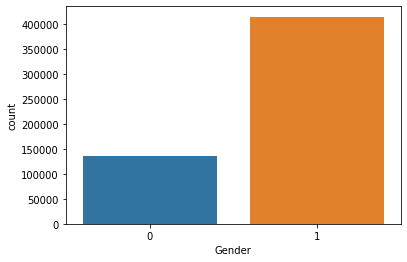

In [43]:
#Gender 
sns.countplot(data['Gender'])

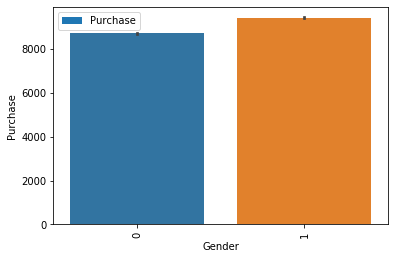

In [34]:
#gender vs purchase
data[['Gender','Purchase']].groupby('Gender').mean().plot.bar()
sns.barplot('Gender', 'Purchase', data= data)
plt.show()

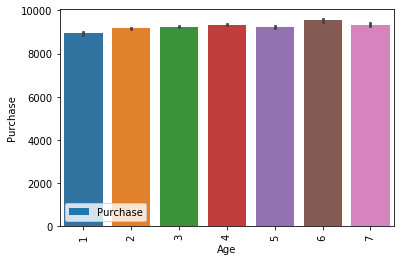

In [35]:
#Age VS Purchase made

data[['Age','Purchase']].groupby('Age').mean().plot.bar()
sns.barplot('Age', 'Purchase', data = data)
plt.show()

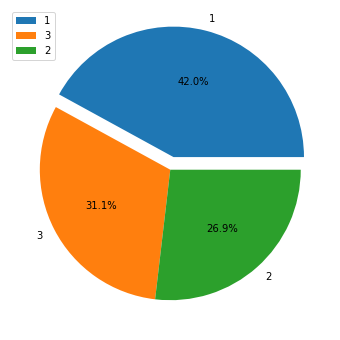

In [36]:
# Cities and Purchase made by people of respective cities

explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots(figsize=(11,6))
ax1.pie(data['City_Category'].value_counts(), explode=explode, labels=data['City_Category'].unique(),
autopct='%1.1f%%')
plt.legend()
plt.show()

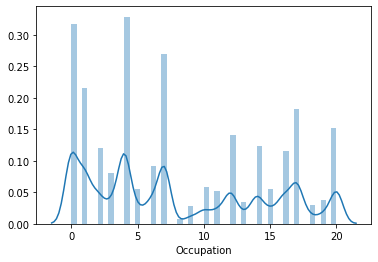

In [37]:
# Distplot of Occupation 

sns.distplot(data['Occupation'])

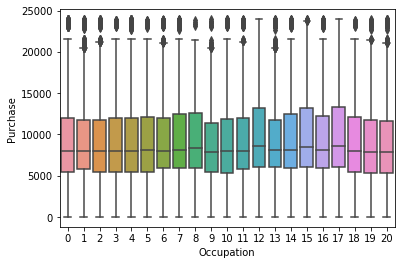

In [38]:
#Occupation vs Purchase

sns.boxplot(x='Occupation',y='Purchase',data=data)

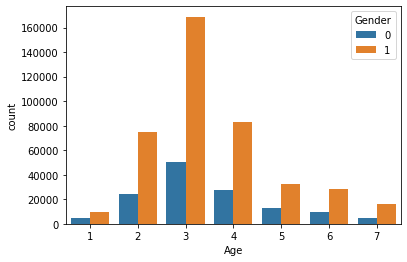

In [42]:
# Age vs Gender

sns.countplot(data['Age'], hue=data['Gender'])

                                     TRAIN AND TEST 

In [44]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [45]:
x_train.shape

(440054, 11)

In [46]:
x_test.shape

(110014, 11)

In [47]:
y_test.shape

(110014, 1)

In [48]:
y_train.shape

(440054, 1)

                                         LINEAR REGRESSION


In [49]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
pred = lr.predict(x_test)

In [51]:
x_test

array([[9.35420000e+04, 1.00000000e+00, 2.00000000e+00, ...,
        6.00000000e+00, 1.26682432e+01, 1.52280000e+04],
       [9.71420000e+04, 1.00000000e+00, 6.00000000e+00, ...,
        9.84232925e+00, 1.26682432e+01, 1.08800000e+03],
       [1.29842000e+05, 1.00000000e+00, 3.00000000e+00, ...,
        8.00000000e+00, 1.50000000e+01, 1.64260000e+04],
       ...,
       [7.00420000e+04, 1.00000000e+00, 4.00000000e+00, ...,
        2.00000000e+00, 1.60000000e+01, 1.94560000e+04],
       [2.54420000e+04, 1.00000000e+00, 3.00000000e+00, ...,
        2.00000000e+00, 9.00000000e+00, 1.95860000e+04],
       [1.09242000e+05, 1.00000000e+00, 4.00000000e+00, ...,
        8.00000000e+00, 1.00000000e+01, 1.65440000e+04]])

In [52]:
y_test

array([[15228],
       [ 1088],
       [16426],
       ...,
       [19456],
       [19586],
       [16544]], dtype=int64)

In [53]:
pred

array([[15228.],
       [ 1088.],
       [16426.],
       ...,
       [19456.],
       [19586.],
       [16544.]])

In [54]:
# Finding the accuracy of linear regressor

accuracy = r2_score(y_test,pred)

In [55]:
accuracy

1.0

                                    MULTIPLE LINEAR REGRESSION

In [59]:
mlr  = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
# Saving the Machine learning model in pickle format


pickle.dump(mlr,open('project.pkl','wb'))

In [61]:
y_pred = mlr.predict(x_test)

In [62]:
x_test

array([[9.35420000e+04, 1.00000000e+00, 2.00000000e+00, ...,
        6.00000000e+00, 1.26682432e+01, 1.52280000e+04],
       [9.71420000e+04, 1.00000000e+00, 6.00000000e+00, ...,
        9.84232925e+00, 1.26682432e+01, 1.08800000e+03],
       [1.29842000e+05, 1.00000000e+00, 3.00000000e+00, ...,
        8.00000000e+00, 1.50000000e+01, 1.64260000e+04],
       ...,
       [7.00420000e+04, 1.00000000e+00, 4.00000000e+00, ...,
        2.00000000e+00, 1.60000000e+01, 1.94560000e+04],
       [2.54420000e+04, 1.00000000e+00, 3.00000000e+00, ...,
        2.00000000e+00, 9.00000000e+00, 1.95860000e+04],
       [1.09242000e+05, 1.00000000e+00, 4.00000000e+00, ...,
        8.00000000e+00, 1.00000000e+01, 1.65440000e+04]])

In [63]:
# Accuracy of multiple linear regression

accuracy = r2_score(y_test,y_pred)

In [64]:
accuracy

1.0

In [65]:
# Output Prediction

mlr.predict([[69042,0,5,16,0,1,3,4,9.842329,12.668243,1234]])

array([[1234.]])

In [66]:
y[0][0]

8370

                                     STANDARD SCALING 

In [67]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

                                DECISION TREE AND RANDOM FOREST REGRESSORS

In [69]:
lr = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
fit1 = lr.fit(x_train,y_train)#Here we fit training data to linear regressor
fit2 = dtr.fit(x_train,y_train)#Here we fit training data to Decision Tree Regressor
fit3 = rfr.fit(x_train,y_train)#Here we fit training data to Random Forest Regressor

C:\Users\siri\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


                                    DECISION TREE REGRESSOR

In [70]:
ydtr=dtr.predict(x_test)

In [71]:
ydtr

array([15218.,  1086., 16416., ..., 19444., 19574., 16534.])

In [72]:
accuracydtr=r2_score(y_test,ydtr)

In [73]:
accuracydtr

0.9999980323682905

                                       RANDOM TREE REGRESSOR 

In [74]:
yrfr=rfr.predict(x_test)

In [75]:
yrfr

array([15218.  ,  1085.99, 16416.  , ..., 19444.  , 19574.  , 16534.  ])

In [76]:
accuracyrfr=r2_score(y_test,yrfr)

In [77]:
accuracyrfr

0.9999980413575976

In [78]:
print("Accuracy Score of Linear regression on train set",fit1.score(x_train,y_train)*100)
print("Accuracy Score of Decision Tree on train set",fit2.score(x_train,y_train)*100)
print("Accuracy Score of Random Forests on train set",fit3.score(x_train,y_train)*100)


Accuracy Score of Linear regression on train set 100.0
Accuracy Score of Decision Tree on train set 100.0
Accuracy Score of Random Forests on train set 99.99999998166061
